# Setup

In [2]:
import locale
locale.setlocale(locale.LC_ALL, 'sv_SE')

%matplotlib inline
from pprint import pprint

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 300

# A-tax vs gross monthly salary

A simple plot of the tax deduction (per month) as a function of gross monthly salary.

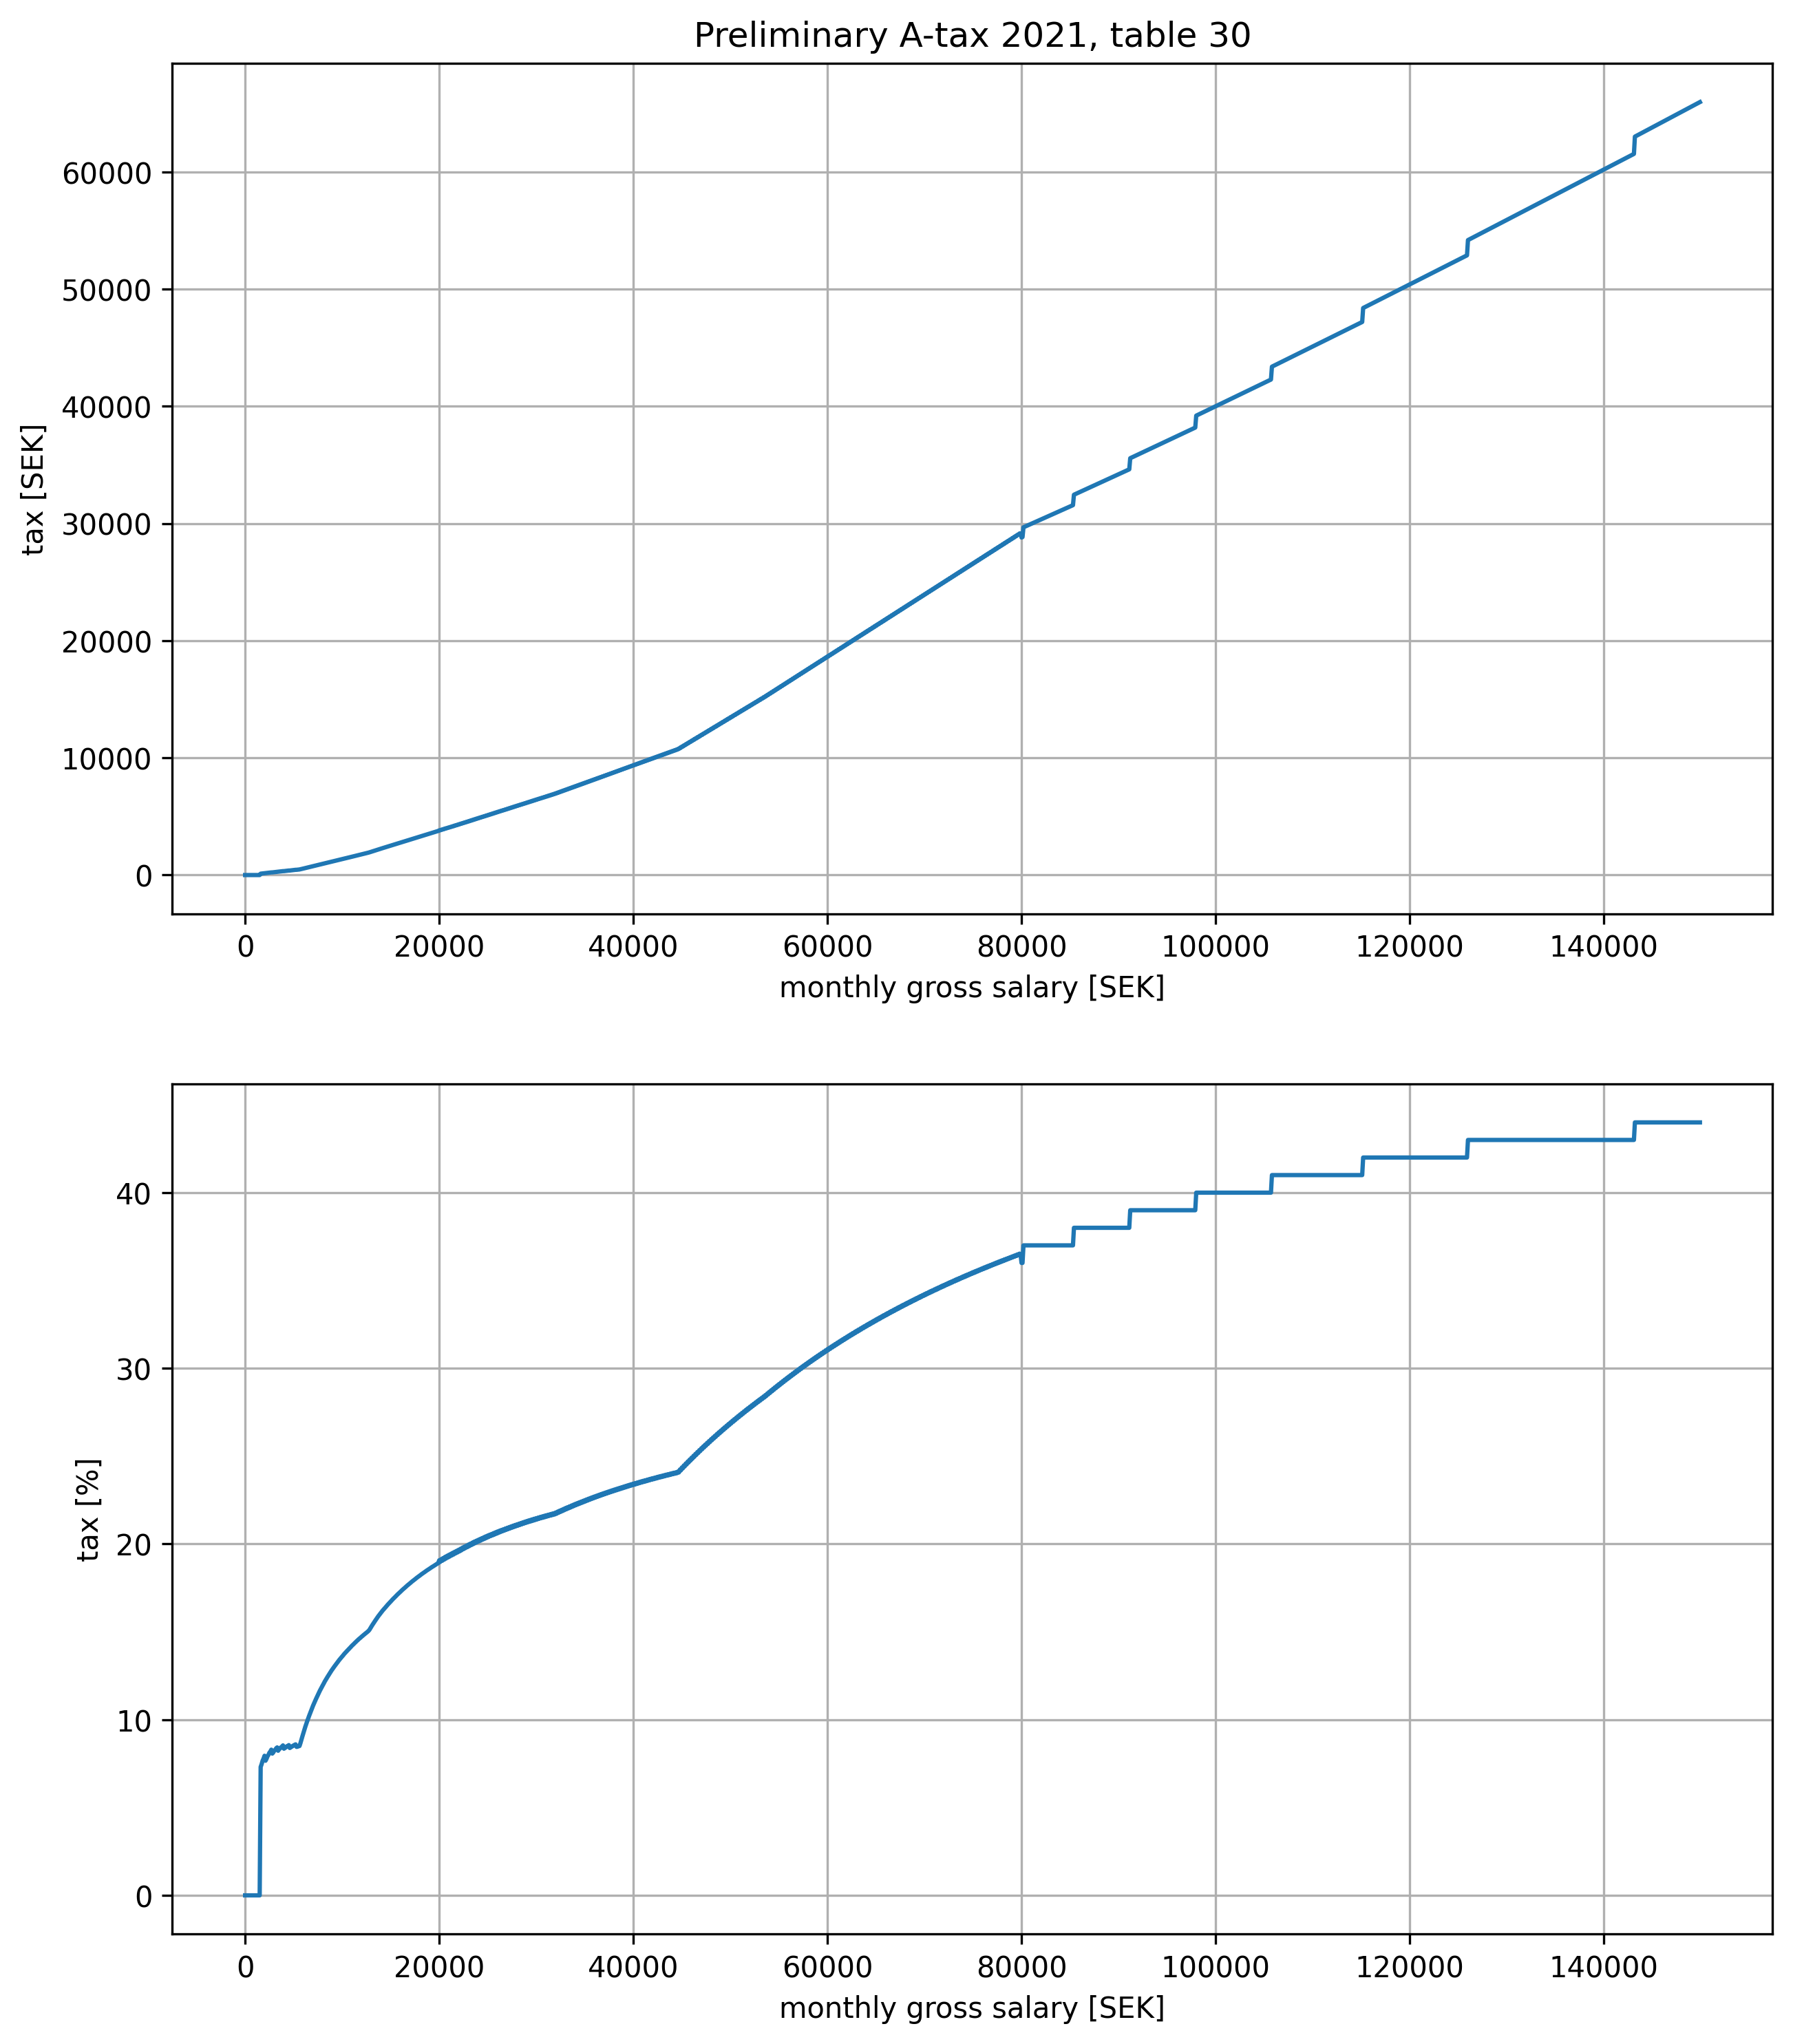

In [4]:
from skattplot.atax import ATax
TAX_TABLE_NO = 30
monthly_salary = range(1, 150000, 100)
atax_table = ATax(TAX_TABLE_NO)
atax = [atax_table.get(s) for s in monthly_salary]
atax_ratio = [atax_table.get(s) * 100.0 / s for s in monthly_salary]

plt.figure(figsize=(10, 12), facecolor='white')

plt.subplot(2,1,1)
plt.plot(monthly_salary, atax)
plt.title(f'Preliminary A-tax 2021, table {TAX_TABLE_NO}')
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [SEK]')
plt.grid('on')

plt.subplot(2,1,2)
plt.plot(monthly_salary, atax_ratio)
plt.xlabel('monthly gross salary [SEK]')
plt.ylabel('tax [%]')
plt.grid('on')
